Task of this notebook:
1. interpolate data (use tdal data as example... function)

In [16]:
# libraries
import json
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from scipy import interpolate
from scipy.interpolate import RectBivariateSpline

In [2]:
# read in PTAL data.
PTAL = pd.read_csv("/Users/June/urbanDNA/Ele-June/June's Data/COA2011 AvPTAI2015.csv")
PTAL.head()

,COA2011,AvPTAI2015,PTAL,PTAIHigh,PTAILow
0,E00000001,51.8576,6b,51.8576,51.8576
1,E00000003,49.8750,6b,49.8750,49.8750
2,E00000005,59.1269,6b,59.1269,59.1269
3,E00000007,82.9036,6b,97.4435,68.2293
4,E00000010,43.0317,6b,43.0317,43.0317


In [8]:
# well.. the grid version is more poised for interpolation
PTAL.grid =pd.read_csv("/Users/June/urbanDNA/Ele-June/June's Data/2015  PTALs Grid Values 280515.csv")
PTAL.grid
# use the Accessiility Index 2015 (AI2015) bc it is numerical variable. 
# PTAL.grid.dtypes
#PTAL.grid.describe()

TypeError: 'module' object is not callable

In [7]:
min(PTAL.grid['X']) #

503596

In [6]:
# x = np.arange(min(PTAL.grid['X'])-1, max(PTAL.grid['X'])+1, 1)
# y = np.arange(min(PTAL.grid['Y'])-1, max(PTAL.grid['Y'])+1, 1)
# xx, yy = np.meshgrid(PTAL.grid['X'], PTAL.grid['Y'])
x = PTAL.grid['X']
y = PTAL.grid['Y']
z = PTAL.grid['AI2015']
f = interpolate.RectBivariateSpline(x, y, z)

TypeError: x must be strictly increasing

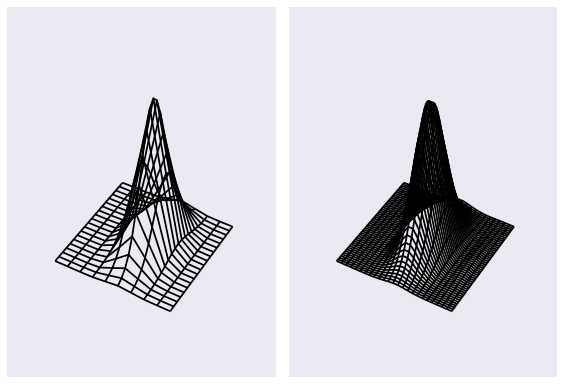

In [23]:
## Example: http://scipython.com/book/chapter-8-scipy/examples/two-dimensional-interpolation-with-scipyinterpolaterectbivariatespline/
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
### the functionis calculated on a regular, coarse grid and then interpolated onto a finer one.
# Regularly-spaced, coarse grid
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = np.arange(-xmax, xmax, dx)
y = np.arange(-ymax, ymax, dy)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(2*X)**2 - (Y/2)**2)

interp_spline = RectBivariateSpline(y, x, Z)

# Regularly-spaced, fine grid
dx2, dy2 = 0.16, 0.16
x2 = np.arange(-xmax, xmax, dx2)
y2 = np.arange(-ymax, ymax, dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = interp_spline(y2, x2)

fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})
ax[0].plot_wireframe(X, Y, Z, color='k')

ax[1].plot_wireframe(X2, Y2, Z2, color='k')
for axes in ax:
    axes.set_zlim(-0.2,1)
    axes.set_axis_off()

fig.tight_layout()
plt.show()

In [21]:
interp_spline.summary()

AttributeError: 'RectBivariateSpline' object has no attribute 'summary'